# What You Will Learn

* While loops
* Infinite loops
* Loop control
    * Explicit number of times
    * User input
    * Command exit status
* Reading files, line-by-line
* `break` and `continue`

# While Loop Format

**Syntax**:

```bash
while [ CONDITION_IS_TRUE ]
do
    # Commands change the condition
    command 1
    command 2
    command N
done
```

NOTE:
* The condition can be any sort of test.
* The condition could also be any command.
    * If the command succeeds and returns a zero exit status, the condition is true and the loop will continue.
    * If the command fails and returns a non-zero exit status, the condition is false and the loop will stop.

# Infinite Loops

**Syntax**:

```bash
while [ CONDITION_IS_TRUE ]
do
    # Commands do NOT change the condition - resulting in INFINITE LOOP
    command N
done
```

**Example**:

```bash
while [ true ]
do
    command N
    sleep 1
done
```


# Example - Loop 5 Times

```bash
INDEX=1
while [ $INDEX -lt 6 ]
do
    echo "Creating project-${INDEX}"
    mkdir /usr/local/project-${INDEX}
    ((INDEX++))
done
```

**Output**:
```bash
Creating project-1
Creating project-2
Creating project-3
Creating project-4
Creating project-5
```

# Example - Checking User Input

```bash
while [ "$CORRECT" != "y" ]
do
    read -p "Enter your name: " NAME
    read -p "Is ${NAME} correct? " CORRECT
done
```

**Output**

```bash
Enter your name: Luke Skywalker
Is Luke Skywalker correct? n
Enter your name: Jason
Is Jason correct? y
```

# Example - Return Code of Command

```bash
while ping -c 1 app1 >/dev/null
do
    echo "app1 still up..."
    sleep 5
done

echo "app1 down, continuing."
```

**Output**

```bash
app1 still up...
app1 still up...
app1 still up...
app1 still up...
app1 still up...
app1 down, continuing.
```

# Reading a file, line-by-line

```bash
LINE_NUM=1
while read LINE
do
    echo "${LINE_NUM}: ${LINE}"
    ((LINE_NUM++))
done < /etc/fstab
```

**Output**

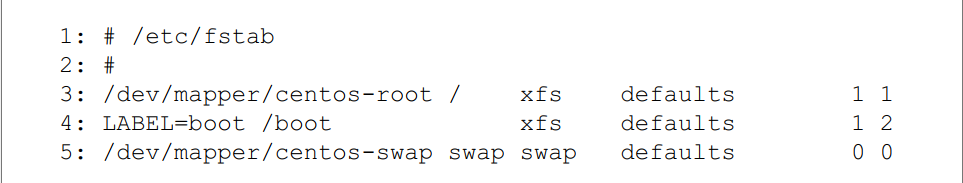

# Reading a file, line-by-line

```bash
grep xfs /etc/fstab | while read LINE
do
    echo "xfs: ${LINE}"
done
```

**Output**

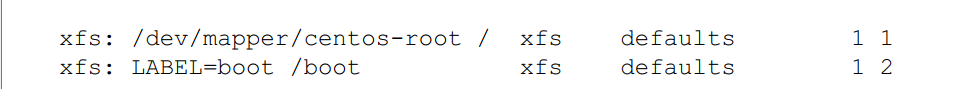

# Example 1

```bash
FS_NUM=1
grep xfs /etc/fstab | while read FS MP REST
do
    echo "${FS_NUM}: file system: ${FS}"
    echo "${FS_NUM}: mount point: ${MP}"
    ((FS_NUM++))
done
```

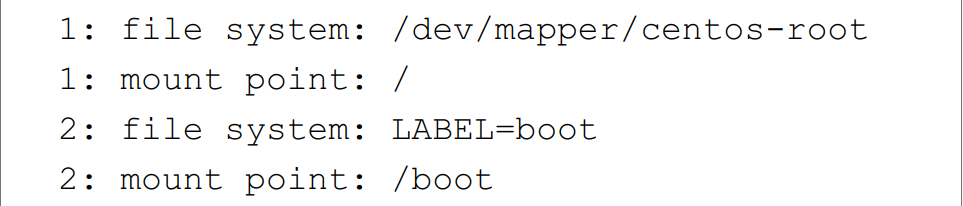


# Example 2

```bash
while [ true ]
do
    read -p "1: Show disk usage. 2: Show uptime. " CHOICE
    
    case "$CHOICE" in
        
        1)
            df -h
            ;;
        
        2)
            uptime
            ;;
        
        *)
            break
            ;;
        
    esac
    
done
```

> Note that the `break` statement exits the loop only, not the script.

# Example 3

```bash
mysql -BNe 'show databases' | while read DB
do
    
    db-backed-up-recently $DB
    
    if [ "$?" -eq "0" ]
    then
        continue
    fi
    
    backup $DB
done
```